In [249]:
import pandas as pd
import numpy as np
%matplotlib inline

In [250]:
df = pd.read_csv("cleaned_Mass Shootings Dataset Ver 5.csv",encoding = "ISO-8859-1")

#Credit for this dataset goes to @zusmani at Kaggle
#https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years 

#I've cleaned the data and split out the date into Month, date, year

In [251]:
df.head()

,S#,Title,City,State,Month,Date,Year,Incident Area,Open/Close Location,Target,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,Sutherland Springs,Texas,11,5,2017,Church,Close,random,...,46,0.0,26.0,NaN,NaN,No,White,Male,NaN,NaN
1,2,Walmart shooting in suburban Denver,Thornton,Colorado,11,1,2017,Wal-Mart,Open,random,...,3,0.0,47.0,NaN,NaN,No,White,Male,NaN,NaN
2,3,Edgewood businees park shooting,Edgewood,Maryland,10,18,2017,Remodeling Store,Close,coworkers,...,6,0.0,37.0,NaN,Advance Granite Store,No,Black,Male,NaN,NaN
3,4,Las Vegas Strip mass shooting,Las Vegas,Nevada,10,1,2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,...,585,1.0,64.0,NaN,NaN,Unclear,White,Male,36.181271,-115.134132
4,5,San Francisco UPS shooting,San Francisco,California,6,14,2017,UPS facility,Close,coworkers,...,5,0.0,38.0,1.0,NaN,Yes,Asian,Male,NaN,NaN


In [252]:
df.columns

Index(['S#', 'Title', 'City', 'State', 'Month', 'Date', 'Year',
       'Incident Area', 'Open/Close Location', 'Target', 'Cause', 'Summary',
       'Fatalities', 'Injured', 'Total victims', 'Policeman Killed', 'Age',
       'Employeed (Y/N)', 'Employed at', 'Mental Health Issues', 'Race',
       'Gender', 'Latitude', 'Longitude'],
      dtype='object')

In [253]:
df.describe()

,S#,Month,Date,Year,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,317.000000,178.000000,67.000000,303.000000,303.000000
mean,162.000000,5.761610,15.659443,2007.439628,4.436533,6.176471,10.263158,0.129338,31.904494,0.626866,37.225076,-94.429539
std,93.386294,3.649489,8.908182,11.356664,5.783208,29.889182,33.662309,0.610294,13.005730,0.487288,5.536365,16.513296
min,1.000000,1.000000,1.000000,1966.000000,0.000000,0.000000,3.000000,0.000000,12.000000,0.000000,21.325512,-161.792752
25%,81.500000,2.500000,7.000000,2000.500000,1.000000,1.000000,4.000000,0.000000,20.000000,0.000000,33.571459,-110.205485
50%,162.000000,5.000000,16.000000,2013.000000,3.000000,3.000000,5.000000,0.000000,31.500000,1.000000,36.443290,-88.122998
75%,242.500000,9.000000,23.500000,2015.000000,5.500000,5.000000,9.000000,0.000000,41.000000,1.000000,41.483844,-81.703237
max,323.000000,12.000000,31.000000,2017.000000,59.000000,527.000000,585.000000,5.000000,70.000000,1.000000,60.790539,-69.707823


#### Observations:

1. Average age of perpetrators = 32
2. Average number of incidences seem to have spiked since 2015
3. Maximum number of fatalities in one incident = 59 (Las Vegas Strip mass shotting in 2017)
4. Maximum number of policeman killed = 5 (Dallas police shooting in 2016)

In [254]:
df['State'].unique()

# *No data on New Hampshire, North Dakota or Rhode Island was present in the dataset
# Can't validate if it was just because no incidents happened there
# or whether it was missed

array(['Texas', 'Colorado', 'Maryland', 'Nevada', 'California',
       'Pennsylvania', 'Florida', 'Ohio', 'Washington', 'Louisiana',
       'Missouri', 'Virginia', nan, 'Illinois', 'Alabama', 'New Mexico',
       'Tennessee', 'North Carolina', 'Kentucky', 'Georgia', 'New Jersey',
       'Michigan', 'Kansas', 'Massachusetts', 'Arizona', 'Mississippi',
       'New York', 'Delaware', 'Nebraska', 'Minnesota', 'Maine', 'Oregon',
       'South Dakota', 'South Carolina', 'Wisconsin', 'Montana',
       'Indiana', 'Oklahoma', 'Idaho', 'West Virginia', 'Connecticut',
       'Arkansas', 'Utah', 'Vermont', 'Hawaii', 'Alaska', 'Wyoming',
       'Iowa'], dtype=object)

### Total Fatalities by Year

### Observations:

1. The past 10 years have been the most deadliest years in regards to gun violence
2. 2010 was the year with the least fatalities in the past 10 years 
3. 2015 was the year with the most fatalities in the last 10 years

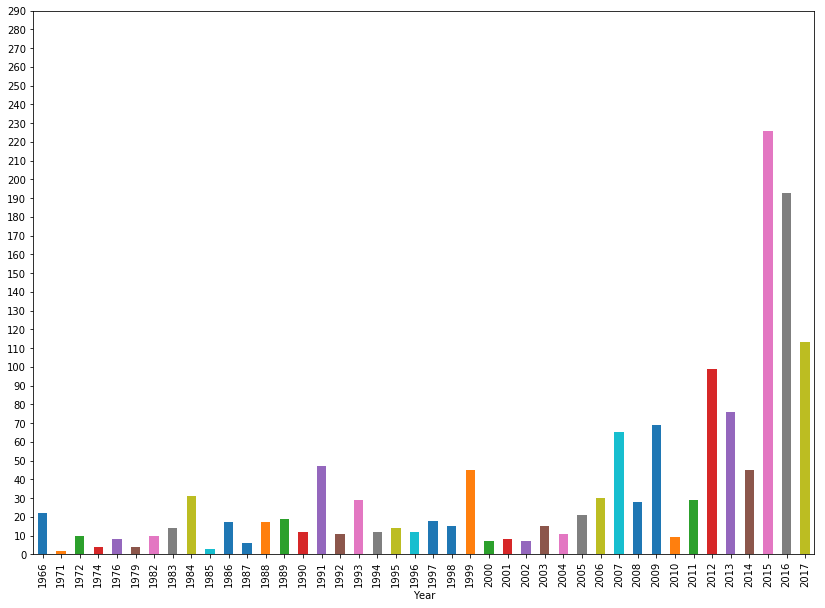

In [255]:
df.groupby(['Year'])['Fatalities'].sum().sort_index().plot(kind='bar', figsize =(14,10), yticks=np.arange(0,300,10))

#### I'm curious to know the reason (if there is one) for the anomaly in 2015 (biggest spike in the last 10 years!)

### Total gun related fatalities in the last 10 years

In [256]:
k = df[((df['Year'] >= 2008) & (df['Year'] <=2017))]
np.sum(k['Fatalities'])

887

### Avg gun related deaths per year in the last 10 years

In [257]:
k = df[((df['Year'] >= 2008) & (df['Year'] <=2017))]
np.sum(k['Fatalities'])/len(np.unique(k['Year']))

88.7

### Shooting instances(injuries + fatalities) by State (arranged in Descending order)

In [258]:
gun_violence_instances = df.groupby(['State'])['Total victims'].sum().sort_values(ascending = False)

gun_violence_by_state = pd.DataFrame()
gun_violence_by_state['Total Instances'] = gun_violence_instances
gun_violence_by_state.reset_index(drop=False, inplace=True)

gun_violence_by_state

,State,Total Instances
0,Nevada,612
1,California,396
2,Texas,316
3,Florida,275
4,Colorado,151
5,Washington,112
6,New York,100
7,Georgia,92
8,Virginia,89
9,Illinois,85


### Top 10 states with the highest number of gun violence related victims

In [259]:
top_10_gun_violence_states = k.head(10)
top_10_gun_violence_states 

,S#,Title,City,State,Month,Date,Year,Incident Area,Open/Close Location,Target,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,Sutherland Springs,Texas,11,5,2017,Church,Close,random,...,46,0.0,26.0,NaN,NaN,No,White,Male,NaN,NaN
1,2,Walmart shooting in suburban Denver,Thornton,Colorado,11,1,2017,Wal-Mart,Open,random,...,3,0.0,47.0,NaN,NaN,No,White,Male,NaN,NaN
2,3,Edgewood businees park shooting,Edgewood,Maryland,10,18,2017,Remodeling Store,Close,coworkers,...,6,0.0,37.0,NaN,Advance Granite Store,No,Black,Male,NaN,NaN
3,4,Las Vegas Strip mass shooting,Las Vegas,Nevada,10,1,2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,...,585,1.0,64.0,NaN,NaN,Unclear,White,Male,36.181271,-115.134132
4,5,San Francisco UPS shooting,San Francisco,California,6,14,2017,UPS facility,Close,coworkers,...,5,0.0,38.0,1.0,NaN,Yes,Asian,Male,NaN,NaN
5,6,Pennsylvania supermarket shooting,Tunkhannock,Pennsylvania,6,7,2017,Weis grocery,Close,coworkers,...,3,NaN,24.0,1.0,Weis grocery,Unclear,White,Male,NaN,NaN
6,7,Florida awning manufacturer shooting,Orlando,Florida,6,5,2017,manufacturer Fiamma Inc.,Close,coworkers,...,5,NaN,45.0,1.0,manufacturer Fiamma Inc.,Unclear,NaN,Male,NaN,NaN
7,8,Rural Ohio nursing home shooting,Kirkersville,Ohio,5,12,2017,a nursing home,Close,coworkers,...,3,1.0,43.0,1.0,some nursing home,Yes,White,Male,NaN,NaN
8,9,Fresno downtown shooting,Fresno,California,4,18,2017,a street in downtown,Open,random,...,3,NaN,39.0,NaN,NaN,Unclear,Black,Male,NaN,NaN
9,10,Fort Lauderdale airport shooting,Fort Lauderdale,Florida,1,6,2017,baggage claim area of the airport,Close,random,...,11,NaN,26.0,NaN,NaN,Yes,Latino,Male,NaN,NaN


### Gun related Fatalities by State (Only fatalities NOT injury)

In [260]:
k = df.groupby(['State'])['Fatalities'].sum().sort_values(ascending = False)
k

State
California        182
Texas             151
Florida           128
Washington         83
Nevada             72
Virginia           51
Arizona            47
Colorado           46
New York           43
Wisconsin          42
Connecticut        42
Georgia            42
North Carolina     40
Pennsylvania       37
Illinois           37
Alabama            32
Michigan           30
Kentucky           27
Oklahoma           26
Ohio               24
Minnesota          22
South Carolina     18
Louisiana          17
Kansas             17
Oregon             17
Nebraska           14
Missouri           14
Mississippi        13
Tennessee          13
New Mexico         12
Massachusetts      12
New Jersey          8
Hawaii              7
Utah                7
Montana             6
Iowa                6
South Dakota        6
West Virginia       5
Arkansas            5
Maine               4
Maryland            4
Idaho               3
Vermont             2
Alaska              2
Delaware            1
Wyom

### Top 10 states with the highest number of gun related fatalities

In [261]:
top_10_fatal_states = k.head(10)
top_10_fatal_states

State
California    182
Texas         151
Florida       128
Washington     83
Nevada         72
Virginia       51
Arizona        47
Colorado       46
New York       43
Wisconsin      42
Name: Fatalities, dtype: int64

### Gun related violence and Gender (of the perpetrators) 

Observations:

1. Almost all perpetrators were Males. Could this be due to the part of the brain that controls agression is different in
    Males v/s Females? Or is it because of some other socio-economic factor? Or something else?

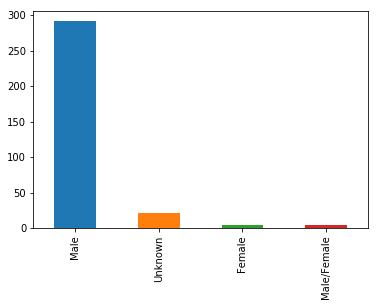

In [262]:
df.Gender.value_counts().plot(kind='bar')

### Do majority of the perpetrators suffer from "mental health issues"?

In [263]:
df['Mental Health Issues'].value_counts()

Unknown    110
Yes        106
No          93
Unclear     13
unknown      1
Name: Mental Health Issues, dtype: int64

#### The data does not support the hypothesis that most of the perpetrators suffer from "mental health issues". Although the "Unknowns" could late be diagnosed with mental health issues, which may influence the results.

### Gun violence and Census data (especially economic indicators)

Money can't buy happines, but is there a correlation between the econmics of a state and the occurence of gun related violence? 

I will be referencing the dataset provided by @MuonNeutrino (Thank you!) and is available at: https://www.kaggle.com/muonneutrino/us-census-demographic-data/data

Given below are the economic indicators that I believe (Hypothesis) influence the occurence of gun related violence:

Income
Median household income ($)

IncomeErr
Median household income error ($)

IncomePerCap
Income per capita ($)

IncomePerCapErr
Income per capita error ($)

Poverty
% under poverty level


ChildPoverty
% of children under poverty level

Unemployment
Unemployment rate (%)



In [264]:
cdata = pd.read_csv("acs2015_census_tract_data.csv", encoding = "ISO-8859-1" )

In [265]:
cdata['Unemployment'].mean()

9.028662959876545

In [266]:
cdata = cdata.set_index('State')

In [267]:
cdata.head()

,CensusTract,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
State,,,,,,,,,,,,,,,,,,,,,
Alabama,1001020100,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
Alabama,1001020200,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
Alabama,1001020300,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
Alabama,1001020400,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
Alabama,1001020500,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [268]:
#Dropped "census tract"

cdata = cdata[['County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']]

In [269]:
cdata = cdata.drop(['District of Columbia', 'Puerto Rico', 'Rhode Island', 'North Dakota', 'New Hampshire'])

In [270]:
cdata = cdata.groupby(['State'])['Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty','Unemployment'].mean().sort_index()

In [271]:
cdata = cdata.reset_index()

In [272]:
cdata_test = cdata.set_index('State').join(gun_violence_by_state.set_index('State'))

In [273]:
cdata_test = cdata_test.reset_index()
cdata_test

,State,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Unemployment,Total Instances
0,Alabama,43296.358603,7644.020443,22840.097021,3360.434043,21.282128,30.225683,10.686723,62
1,Alaska,70354.743902,9743.567073,33003.228916,4417.463855,11.338922,15.187273,9.268072,4
2,Arizona,54207.820955,9049.810345,26363.113891,3882.750494,18.631860,24.899259,9.469901,73
3,Arkansas,41935.633968,7056.516837,22126.816058,3212.827737,20.575766,29.091069,8.529489,18
4,California,67264.782303,11220.131976,31154.595604,4423.282503,16.550419,20.744692,10.191290,396
5,Colorado,64657.801787,9643.427295,32248.106280,4393.369565,13.268259,16.849107,7.194094,151
6,Connecticut,76146.560588,12021.211750,38528.915459,5161.891304,11.755744,14.521550,9.382104,44
7,Delaware,61827.976636,9611.799065,31446.654206,4223.971963,12.829907,17.205164,7.952336,5
8,Florida,50690.194987,8946.579176,28149.090735,4611.235238,17.188406,23.677524,10.021406,275
9,Georgia,50811.082051,8870.428205,25188.585890,3781.961145,20.502712,28.148283,10.361054,92


### Let's see if there is a correlation between any of the economic factors and the total gun related instances

In [274]:
cdata_test.corr()['Total Instances'].sort_values(ascending = False)

Total Instances    1.000000
IncomePerCapErr    0.356430
Unemployment       0.343496
IncomeErr          0.248663
Poverty            0.093302
ChildPoverty       0.092576
Income             0.078511
IncomePerCap       0.069718
Name: Total Instances, dtype: float64

#### Based on data, "Unemployment" seems to be the only indicator that seems to have a very small (0.34) correlation to gun violence 

#### Hence, economic factors DO NOT seem to have a strong enough bearing on the number of gun related incidents in a state

### Here is some data to bolster the claim ...

### Top 10 states with the highest Unemployment percentage and the corresponding total gun related incidents in those states 

In [275]:
top10_unemployment = cdata_test[['State', 'Unemployment', 'Total Instances']].sort_values('Total Instances', ascending = False).head(10)
print("Avg. unemployment percentage for 10 states with the HIGHEST gun related incidents = ", top10_unemployment['Unemployment'].mean())
print("")

print("Avg. unemployment percentage for all states = ", cdata['Unemployment'].mean())
print("")

bottom10_unemployment = cdata_test[['State', 'Unemployment', 'Total Instances']].sort_values('Unemployment', ascending = False).tail(10)
print("Avg. unemployment percentage for 10 states with the LOWEST gun related incidents = ", bottom10_unemployment['Unemployment'].mean())
print("")

Avg. unemployment percentage for 10 states with the HIGHEST gun related incidents =  9.009344571166789

Avg. unemployment percentage for all states =  8.273580150384346

Avg. unemployment percentage for 10 states with the LOWEST gun related incidents =  5.649894645901513

